# About

This notebook is a quick reference for basic statistical concepts.

# Populations

Imagine a farm that grows and produces peas. Further imagine that we want to describe the size of the peas produced by this farm in 2018. To quantify the size of the pea, we can measure its diameter and assume that all peas are spherical. The __population__ of interest, $X$, consists of the diameters of all peas produced by this farm in the year 2018.

Suppose that (through some very expensive means) we were able to measure the diameters of all 1 million peas produced by this farm in 2018. We would get a table like this:

| Pea Number | Diameter [mm] |
| ---------- | ------------- |
|      1     |       5.01    |
|      2     |       4.73    |
|      3     |       5.46    |
|      ...   |       ...     |

We can use Python to generate these numbers. First, we import some useful libraries.

In [14]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

Then we generate 1 million diameters in millimeters.

In [15]:
N = 1000000 # population size
# 5 is the simulated mean of the population
# 0.5 is the simulated standard deviation of the population
X = np.random.randn(N) * 0.5 + 5

Every pea in this population will have slightly different diameters. To summarize this, we can take the __mean__, $\mu$, of all diameters by adding all the diameters, $x$, and dividing by the number of diameters:

$$\mu_x=\frac{1}{N}\sum_{i=1}^N x_i$$

In [16]:
mu = round(np.mean(X), 4)
print(mu)

4.9999


Next, we may want to know how varied or how spread out the diameters of the peas are. For this, we can calculate the standard deviation of the diameters:

$$\sigma_x=\sqrt{\frac{\sum_{i=1}^N x_i-\mu_x}{N}}$$ 

In [17]:
sigma = round(np.std(X, ddof = 0), 4)
print(sigma)

0.4994


To further characterize the size of these peas, we can create a __histogram__ to visualize how many peas are of a certain size.

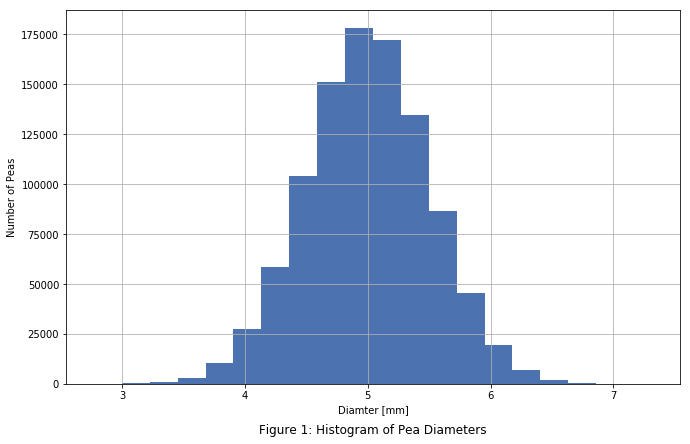

In [18]:
def plotX(fig, numBins = 10):
    fig.set_size_inches(11, 6.875) # 11 inches wide, 6.875 inches tall
    axes = fig.add_subplot(1,1,1) # 1 row, 1 column, 1st plot

    # numBins equally-sized bins
    freq, bins, patches = axes.hist(x = X, bins = numBins)
    axes.grid(b = True) # show grid

    axes.set_xlabel('Diamter [mm]') # x-axis title
    axes.set_ylabel('Number of Peas') # y-axis title
    return (axes, freq, bins, patches)

# close all the figures
plt.close()

# call the function
figNum = 1
fig = plt.figure()
axes, freq, bins, patches = plotX(fig, numBins = 20)

# set title of the figure
axes.set_title('Figure {}: Histogram of Pea Diameters'.format(figNum)
              ,y = -0.15)

# show the figure
plt.show()

The population mean and standard deviation are known as population __parameters__. Population parameters are often unknown because they are usually too costly to measure. We do not want to use a ruler to measure the diameters of 1 million peas!

## Population Distribution


The __population distribution__ of the diameters is the __probability density function__ that shows how frequently we encounter peas of a certain size. We can try to use the normal model by fitting the __normal distribution__ to the population:

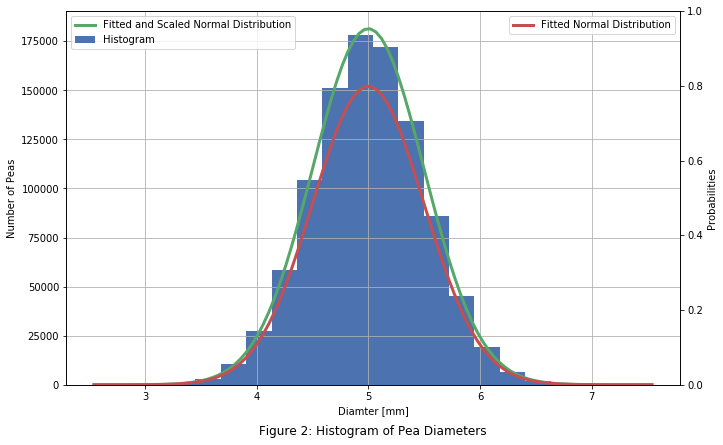

In [19]:
# close all figures
plt.close()

# use 'seaborn-deep' style for plotting
mpl.style.use('seaborn-deep')

# plot a histogram of the population using
# the function defined previously
figNum = figNum + 1
fig = plt.figure()
axes, freq, bins, patches = plotX(fig, numBins = 20)

# calculate the width of each bin
axes.get_children
binWidth = bins[1] - bins[0]

# create x-axis values for the fitted normal distribution
# create numPoints equally-spaced points
numPoints = 100
xAxisNormalMin = bins[0] - binWidth
xAxisNormalMax = bins[-1] + binWidth
xAxisNormal = np.linspace(xAxisNormalMin, xAxisNormalMax, numPoints)

# calculate the probabilities of each bin according
# to the normal distribution
y = np.round(stats.norm.pdf(xAxisNormal, mu, sigma), 4)

# to scale the fitted normal distribution, we can attempt
# to make the area occupied by the histogram approximately
# equal to the area occupied by the fitted normal distribution
areaHist = np.sum(freq * binWidth)
yScaled = y * areaHist

# plot on the figure
lines = axes.plot(xAxisNormal, yScaled)
lines[0].set_linewidth(3)

# set title of the figure
axes.set_title('Figure {}: Histogram of Pea Diameters'.format(figNum)
              ,y = -0.15)

axes.legend(['Fitted and Scaled Normal Distribution','Histogram']
           ,loc = 'upper left')

# alternatively, we can plot the fitted normal
# distribution on another y-axis

# create a second y-axis that shares the same x-axis as axes
axes2 = axes.twinx()
axes2.set_ylim([0,1])
axes2.set_ylabel('Probabilities')

# plot on the figure and show
lines = axes2.plot(xAxisNormal, y)
lines[0].set_linewidth(3)
lines[0].set_color('C2')
axes2.legend(['Fitted Normal Distribution'], loc = 'upper right')

plt.show()

# Samples 

 Instead of measuring the diameters of all 1 million peas, we can hope infer something about the population parameters by taking a sample. Let's say we take 20 peas and measure their diameters. We have taken a __sample__, $x$, of size $n=20$.


In [20]:
# rerun this cell to pick a different sample

n = 20 # sample size
x = np.random.choice(X, size = n) # pick a sample
print(np.round(x,4))

[5.4489 5.583  5.6512 4.844  5.0446 5.6298 4.6649 5.8412 5.5931 4.9136
 4.5541 4.6988 4.8552 4.422  5.1179 5.9079 3.621  4.907  5.3767 5.0323]
